In [1]:
import DiadFit as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pyrolite.comp.codata import close
from pyrolite.plot import pyroplot
from pyrolite.plot.density import density

In [2]:
# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# Load in Pyroxene data for each sample
Sam = ["03b", "04b", "09g1", "09g2", "09g3"]
Data = {}
for s in Sam:
    Data[s] = pd.read_excel("Data/FullEDSResults.xlsx", sheet_name=s)

In [4]:
# split into clinopyroxene and orthopyroxene dataframes
Cpx = {}
Opx = {}

for s in Sam:
    Cpx[s] = Data[s].copy()
    Cpx[s] = Cpx[s][Cpx[s]['Sample'].str.contains("Cpx")]
    Cpx[s] = Cpx[s].reset_index(drop = True)

    Opx[s] = Data[s].copy()
    Opx[s] = Opx[s][Opx[s]['Sample'].str.contains("Opx")]
    Opx[s] = Opx[s].reset_index(drop = True)

    # reset columns headers for Opx dataframe
    Opx[s].columns = Opx[s].columns.str.replace("_Cpx", "_Opx", regex=True)

In [5]:
# Split into measurements and error dataframes for each phase
Cpx_err = {}
Opx_err = {}

for s in Sam:
    Cpx_err[s] = Cpx[s].loc[:,Cpx[s].columns.str.contains("_Err")].copy()
    Opx_err[s] = Opx[s].loc[:,Opx[s].columns.str.contains("_Err")].copy()

    Cpx[s]['Sample_ID_Cpx'] = np.linspace(0,len(Cpx[s]['SiO2_Cpx'])-1, len(Cpx[s]['SiO2_Cpx']))
    Opx[s]['Sample_ID_Opx'] = np.linspace(0,len(Opx[s]['SiO2_Opx'])-1, len(Opx[s]['SiO2_Opx']))

In [6]:
Cpx_error = {}
Opx_error = {}

for s in Sam:
    Cpx_error[s] = pt.add_noise_sample_1phase(phase_comp=Cpx[s], phase_err=Cpx_err[s],
                                             phase_err_type="Abs", duplicates=200, err_dist="normal")
    Opx_error[s] = pt.add_noise_sample_1phase(phase_comp=Opx[s], phase_err=Opx_err[s],
                                             phase_err_type="Abs", duplicates=200, err_dist="normal")

All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


/Users/gleesonm/anaconda3/lib/python3.11/site-packages/Thermobar/noise_averaging.py:587: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mynoisedDataframe=mynoisedDataframe.fillna(0)
/Users/gleesonm/anaconda3/lib/python3.11/site-packages/Thermobar/noise_averaging.py:587: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mynoisedDataframe=mynoisedDataframe.fillna(0)
/Users/gleesonm/anaconda3/lib/python3.11/site-packages/Thermobar/noise_averaging.py:587: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a 

In [7]:
P_T36_P39 = {}
P_T36_P38 = {}

for s in Sam:
    P_T36_P39[s]=pt.calculate_cpx_opx_press_temp(opx_comps=Opx_error[s], cpx_comps=Cpx_error[s],
                                          equationP="P_Put2008_eq39",
                                          equationT="T_Put2008_eq36")
    
    P_T36_P38[s]=pt.calculate_cpx_opx_press_temp(opx_comps=Opx_error[s], cpx_comps=Cpx_error[s],
                                          equationP="P_Put2008_eq38",
                                          equationT="T_Put2008_eq36")

In [8]:
# load plagioclase data
Plag_noise = {}
for s in Sam:
    Plag_noise[s] = pd.read_excel('Plag_noise.xlsx', sheet_name = s)

In [9]:
Plag_noise["09g"] = pd.concat([Plag_noise["09g1"], Plag_noise["09g2"], Plag_noise["09g3"]], ignore_index=True)
P_T36_P39["09g"] = pd.concat([P_T36_P39["09g1"], P_T36_P39["09g2"], P_T36_P39["09g3"]], ignore_index=True)
P_T36_P38["09g"] = pd.concat([P_T36_P38["09g1"], P_T36_P38["09g2"], P_T36_P38["09g3"]], ignore_index=True)
color = {"04b": [0,0,1],
         "03b": [0,0,0.56],
         "09g": [1,0,0]}


In [10]:
T_03b = pd.concat([P_T36_P38['03b'], P_T36_P39['03b']])
T_03b = T_03b.reset_index(drop = True)
T_03b.to_excel('T_03b.xlsx')

T_04b = pd.concat([P_T36_P38['04b'], P_T36_P39['04b']])
T_04b = T_04b.reset_index(drop = True)
T_04b.to_excel('T_04b.xlsx')

In [11]:
Cpx_Flo = pd.read_excel('PubData/FloreanaCpx_Gleeson.xlsx')
Cpx_Flo = Cpx_Flo[Cpx_Flo['Group'] == "Antecryst"]
Cpx_Flo = Cpx_Flo.reset_index(drop = True)
Cpx_Flo = Cpx_Flo.drop(columns = ['Sample', 'Mineral', 'Group'])
Cpx_Flo.columns = Cpx_Flo.columns + '_Cpx'
Cpx_Flo.loc[:, 'Sample_ID_Cpx'] = np.linspace(0, len(Cpx_Flo['SiO2_Cpx'])-1, len(Cpx_Flo['SiO2_Cpx']))

Liq_Flo = pd.read_excel('PubData/Gleeson_Liq.xlsx')

Cpx_Wolf = pd.read_excel('PubData/Stock_Wolf_Cpx.xlsx')
Cpx_Wolf.columns = Cpx_Wolf.columns + '_Cpx'
Cpx_Wolf.loc[:, 'Sample_ID_Cpx'] = np.linspace(0, len(Cpx_Wolf['SiO2_Cpx'])-1, len(Cpx_Wolf['SiO2_Cpx']))

Liq_Wolf = pd.read_excel('PubData/Stock_Wolf_Liq.xlsx')
Liq_Wolf.loc[:, 'Sample_ID_Liq'] = np.linspace(0, len(Liq_Wolf['SiO2_Liq'])-1, len(Liq_Wolf['SiO2_Liq']))

In [12]:
Wolf_press=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=Cpx_Wolf, liq_comps=Liq_Wolf, equationP="P_Neave2017",
                                                      equationT="T_Put2008_eq33", H2O_Liq = 0.75)
Flo_press=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=Cpx_Flo, liq_comps=Liq_Flo, equationP="P_Neave2017",
                                                      equationT="T_Put2008_eq33", H2O_Liq = 0.75,
                                                      Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12,
                                                      CaTs_Err=0.06) # errors consistent with Gleeson et al. 2020


Considering N=522 Cpx & N=58 Liqs, which is a total of N=30276 Liq-Cpx pairs, be patient if this is >>1 million!


/Users/gleesonm/anaconda3/lib/python3.11/site-packages/Thermobar/core.py:1727: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_liq_cpxs.replace([np.inf, -np.inf], np.nan, inplace=True)


7936 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=4513 Cpx-Liq matches using the specified filter. N=140 Cpx out of the N=522 Cpx that you input matched to 1 or more liquids
Considering N=96 Cpx & N=163 Liqs, which is a total of N=15648 Liq-Cpx pairs, be patient if this is >>1 million!
4735 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1703 Cpx-Liq matches using the specified filter. N=73 Cpx out of the N=96 Cpx that you input matched to 1 or more liquids


/Users/gleesonm/anaconda3/lib/python3.11/site-packages/Thermobar/core.py:1727: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combo_liq_cpxs.replace([np.inf, -np.inf], np.nan, inplace=True)


In [41]:
# Add FI measurements
# Load fluid inclusion microthermometry data
FI = pd.read_excel('Data/FluidInclusions_final.xlsx')

# Set up DataFrame for Monte Carlo sampling
Results = pd.DataFrame(data = np.zeros((1000*len(FI['Mean_CO2dens (gcm3)']),3)), 
                       columns = ['Sample', 'T_C', 'CO2_density'])

Results['Sample'] = [None]*len(Results['Sample'])
CO2 = np.array([])
for i in range(len(FI['Mean_CO2dens (gcm3)'])):
    A = np.random.random(1000)
    if '03b' in FI['Sample'].loc[i]:
        Results.loc[i*1000:1000+i*1000,'Sample'] = "03b"
    else:
        Results.loc[i*1000:1000+i*1000,'Sample'] = "04b"

    CO2_new = FI.loc[i,'Min_CO2dens (gcm3)'] + A*(FI.loc[i,'Max_CO2dens (gcm3)'] - FI.loc[i,'Min_CO2dens (gcm3)']) 
    CO2 = np.concatenate([CO2, CO2_new])

Results['CO2_density'] = CO2

# extract temperatures from cpx-opx barometry
T1 = T_03b['T_K_calc'].sample(len(Results[Results['Sample'] == "03b"]), replace=True).values - 273.15
T2 = T_04b['T_K_calc'].sample(len(Results[Results['Sample'] == "04b"]), replace=True).values - 273.15
T = np.concatenate([T2,T1])

Results['T_C'] = T

# Now convert these CO2 densities into entrapment pressures
Results['P_MPa'] = pf.calculate_P_for_rho_T(CO2_dens_gcm3=Results['CO2_density'], T_K=Results['T_C']+273.15, EOS='SW96')['P_MPa']

# Extract the mean and std for plotting
BasicOutput = pd.DataFrame(columns = ['Sample', 'P_MPa_mean', 'P_MPa_median', 'P_MPa_std', 'T_C_mean', 'T_C_median', 'T_C_std', 'T_plag_low', 'T_plag_high', 'P_plag_low', 'P_plag_high'])
BasicOutput['Sample'] = FI['Sample']

for i in range(len(BasicOutput['Sample'])):
    BasicOutput.loc[i,'P_MPa_mean'] = np.nanmean(Results['P_MPa'].loc[i*1000:100 + i*1000])
    BasicOutput.loc[i,'P_MPa_median'] = np.nanmedian(Results['P_MPa'].loc[i*1000:100 + i*1000])
    BasicOutput.loc[i,'P_MPa_std'] = np.nanstd(Results['P_MPa'].loc[i*1000:100 + i*1000])

    BasicOutput.loc[i,'T_C_mean'] = np.nanmean(Results['T_C'].loc[i*1000:100 + i*1000])
    BasicOutput.loc[i,'T_C_median'] = np.nanmedian(Results['T_C'].loc[i*1000:100 + i*1000])
    BasicOutput.loc[i,'T_C_std'] = np.nanstd(Results['T_C'].loc[i*1000:100 + i*1000])

BasicOutput.loc[BasicOutput['Sample'].str.contains('03b'),'T_plag_low'] = Plag_noise['03b']['T_C'].mean() - 2*Plag_noise['03b']['T_C'].std()
BasicOutput.loc[BasicOutput['Sample'].str.contains('03b'),'T_plag_high'] = Plag_noise['03b']['T_C'].mean() + 2*Plag_noise['03b']['T_C'].std()
BasicOutput.loc[BasicOutput['Sample'].str.contains('04b'),'T_plag_low'] = Plag_noise['04b']['T_C'].mean() - 2*Plag_noise['04b']['T_C'].std()
BasicOutput.loc[BasicOutput['Sample'].str.contains('04b'),'T_plag_high'] = Plag_noise['04b']['T_C'].mean() + 2*Plag_noise['04b']['T_C'].std()

BasicOutput['P_plag_low'] = pf.calculate_P_for_rho_T(CO2_dens_gcm3=FI['Mean_CO2dens (gcm3)'], T_K=BasicOutput['T_plag_low']+273.15, EOS='SW96')['P_MPa']
BasicOutput['P_plag_high'] = pf.calculate_P_for_rho_T(CO2_dens_gcm3=FI['Mean_CO2dens (gcm3)'], T_K=BasicOutput['T_plag_high']+273.15, EOS='SW96')['P_MPa']

/var/folders/vm/7v8p43js2918h18x32py6b9r0000gn/T/ipykernel_82753/3476329038.py:38: RuntimeWarning: Mean of empty slice
  BasicOutput.loc[i,'P_MPa_mean'] = np.nanmean(Results['P_MPa'].loc[i*1000:100 + i*1000])
/Users/gleesonm/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/Users/gleesonm/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/vm/7v8p43js2918h18x32py6b9r0000gn/T/ipykernel_82753/3476329038.py:38: RuntimeWarning: Mean of empty slice
  BasicOutput.loc[i,'P_MPa_mean'] = np.nanmean(Results['P_MPa'].loc[i*1000:100 + i*1000])
/Users/gleesonm/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, k

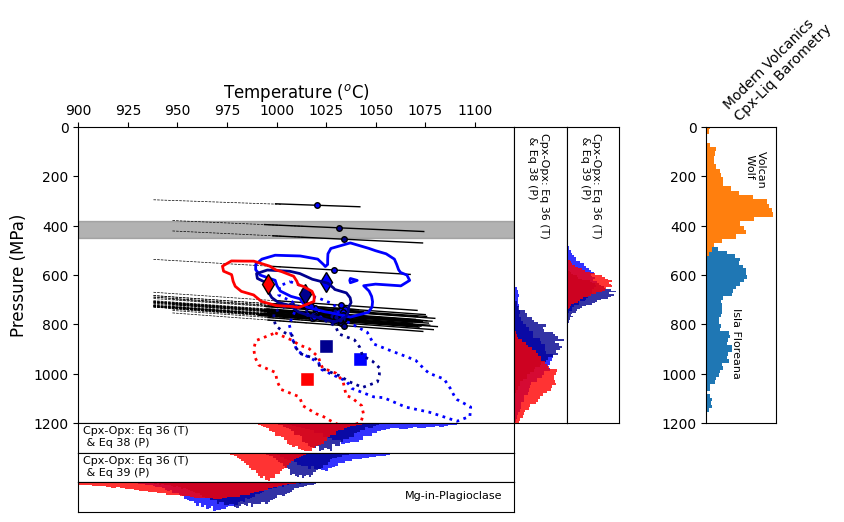

In [32]:
f, a = plt.subplots(4, 5, figsize = (9,5), gridspec_kw={'width_ratios': [2.5, 0.3,0.3,0.5,0.4],
                                                        'height_ratios': [2, 0.2, 0.2, 0.2]})
plt.subplots_adjust(wspace=0.0,hspace=0.0)

a[0][0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
a[0][0].xaxis.set_label_position('top')
a[0][0].axhspan(380, 450, color='grey', alpha=0.6)

for i in range(4):
    a[0][0].set_xlim([900,1120])
    if i > 0.0:
        a[i][0].set_xlim([900,1120])
        a[i][0].xaxis.set_tick_params(labelbottom=False)
        a[i][0].set_xticks([])
        a[i][0].yaxis.set_tick_params(labelbottom=False)
        a[i][0].set_yticks([])
    for j in range(5):
        if i > 0 and j > 0:
            a[i][j].axis("off")

        if i == 0:
            a[i][j].set_ylim([1200,0])
            if j > 0:
                a[i][j].xaxis.set_tick_params(labelbottom=False)
                a[i][j].set_xticks([])
                if j!=4:
                    a[i][j].yaxis.set_tick_params(labelbottom=False)
                    a[i][j].set_yticks([])

a[0][3].axis("off")

for c in color:
    a[3][0].hist(Plag_noise[c]['T_C'], density = True, bins = 100, color = color[c], alpha = 0.8)
    a[1][0].hist(P_T36_P38[c]['T_K_calc']-273.15, density = True, bins = 50, color = color[c], alpha = 0.8)
    a[2][0].hist(P_T36_P39[c]['T_K_calc']-273.15, density = True, bins = 50, color = color[c], alpha = 0.8)

    a[0][1].hist(P_T36_P38[c]['P_kbar_calc']*100, density = True, bins = 50, color = color[c], alpha = 0.8, orientation = "horizontal")
    a[0][2].hist(P_T36_P39[c]['P_kbar_calc']*100, density = True, bins = 50, color = color[c], alpha = 0.8, orientation = "horizontal")

a[1][0].invert_yaxis() 
a[2][0].invert_yaxis()        
a[3][0].invert_yaxis()

# Add in the Moho
# a[0][0].fill_between([880,1120], [380,380], [500,500], hatch = '/', color = 'none', edgecolor = 'gray', zorder = 0)# color = [0.8, 0.8, 0.8])

for s in color:
    P_T36_P39[s]['P_MPa_calc'] = P_T36_P39[s]['P_kbar_calc']*100
    P_T36_P39[s]['T_C_calc'] = P_T36_P39[s]['T_K_calc']-273.15
    
    P_T36_P39[s].loc[:, ["T_C_calc", "P_MPa_calc"]].pyroplot.density(ax = a[0][0],
        contours=[0.95], colors = [color[s]], linewidths = 2, label_contours=False, zorder = 3)
    a[0][0].plot(np.nanmean(P_T36_P39[s]['T_C_calc']),
           np.nanmean(P_T36_P39[s]['P_MPa_calc']), 'dk', mfc = color[s], ms = 10, zorder = 3)
    

    P_T36_P38[s]['P_MPa_calc'] = P_T36_P38[s]['P_kbar_calc']*100
    P_T36_P38[s]['T_C_calc'] = P_T36_P38[s]['T_K_calc']-273.15
    
    P_T36_P38[s].loc[:, ["T_C_calc", "P_MPa_calc"]].pyroplot.density(ax = a[0][0],
        contours=[0.95], colors = [color[s]], linewidths = 2, linestyles = ':', label_contours=False, zorder = 3)
    a[0][0].plot(np.nanmean(P_T36_P38[s]['T_C_calc']),
           np.nanmean(P_T36_P38[s]['P_MPa_calc']), 'sw', mfc = color[s], ms = 10, zorder = 3)

# Add in FI constraints
for r in range(len(BasicOutput['T_plag_low'])):
    a[0][0].plot([BasicOutput.loc[r, 'T_plag_low'],BasicOutput.loc[r, 'T_plag_high']],
                 [BasicOutput.loc[r, 'P_plag_low'],BasicOutput.loc[r, 'P_plag_high']], '--k', lw = 0.5)
a[0][0].plot(np.array([BasicOutput['T_C_mean'].values - 2*BasicOutput['T_C_std'].values,BasicOutput['T_C_mean'].values + 2*BasicOutput['T_C_std'].values]),
       np.array([BasicOutput['P_MPa_mean'].values - 2*BasicOutput['P_MPa_std'].values,BasicOutput['P_MPa_mean'].values + 2*BasicOutput['P_MPa_std'].values]),
       '-k')
a[0][0].plot(BasicOutput['T_C_median'][BasicOutput['Sample'].str.contains('04b')],
       BasicOutput['P_MPa_median'][BasicOutput['Sample'].str.contains('04b')],
       'ok', mfc = (0,0,1))
a[0][0].plot(BasicOutput['T_C_median'][BasicOutput['Sample'].str.contains('03b')],
       BasicOutput['P_MPa_median'][BasicOutput['Sample'].str.contains('03b')],
       'ok', mfc = (0,0,0.56))

a[0][0].set_ylabel('Pressure (MPa)')
a[0][0].set_xlabel('Temperature ($^o$C)')

# a[0][0].text(905,450,'Moho')
a[1][0].text(0.01,0.25,'Cpx-Opx: Eq 36 (T) \n & Eq 38 (P)', transform=a[1][0].transAxes, fontsize = 8)
a[2][0].text(0.01,0.25,'Cpx-Opx: Eq 36 (T) \n & Eq 39 (P)', transform=a[2][0].transAxes, fontsize = 8)
a[3][0].text(0.75,0.45,'Mg-in-Plagioclase', transform=a[3][0].transAxes, fontsize = 8)


a[0][4].hist(Flo_press['All_PTs']['P_kbar_calc']*100, bins = 50, orientation = "horizontal", density = True)
a[0][4].hist(Wolf_press['All_PTs']['P_kbar_calc']*100, bins = 50, orientation = "horizontal", density = True)


a[0][1].text(0.25,0.62,'Cpx-Opx: Eq 36 (T) \n & Eq 38 (P)', transform=a[0][1].transAxes, fontsize = 8, rotation = -90)
a[0][2].text(0.25,0.62,'Cpx-Opx: Eq 36 (T) \n & Eq 39 (P)', transform=a[0][2].transAxes, fontsize = 8, rotation = -90)

a[0][4].text(0.55,0.79,'Volcan \n Wolf', transform=a[0][4].transAxes, fontsize = 8, rotation = -90)
a[0][4].text(0.35,0.159,'Isla Floreana', transform=a[0][4].transAxes, fontsize = 8, rotation = -90)
a[0][4].text(1, 1.2, 'Modern Volcanics \n Cpx-Liq Barometry', transform=a[0][4].transAxes, fontsize = 10, ha='center', va='center', rotation = 45)

plt.savefig('Fig10.svg', dpi = 600, format = 'svg')


Text(0.5, 1.0, 'Isla Floreana')

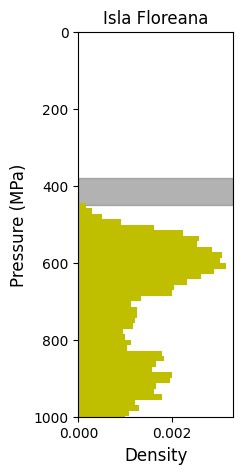

In [15]:
f, a = plt.subplots(1,1, figsize = (2,5))
a.axhspan(380, 450, color='grey', alpha=0.6)
a.hist(Flo_press['All_PTs']['P_kbar_calc']*100, bins = 50, orientation = "horizontal", density = True, color = 'y')
a.set_xlabel('Density')
a.set_ylabel('Pressure (MPa)')
a.set_ylim([1000,0])
a.set_title('Isla Floreana')

# Fluid inclusions for Fig 8

In [42]:
FI_final = BasicOutput.copy()
FI_final_04b = FI_final[FI_final['Sample'].str.contains('04b')]
FI_final_04b = FI_final_04b.reset_index(drop = True)
FI_final_03b = FI_final[FI_final['Sample'].str.contains('03b')]
FI_final_03b = FI_final_03b.reset_index(drop = True)

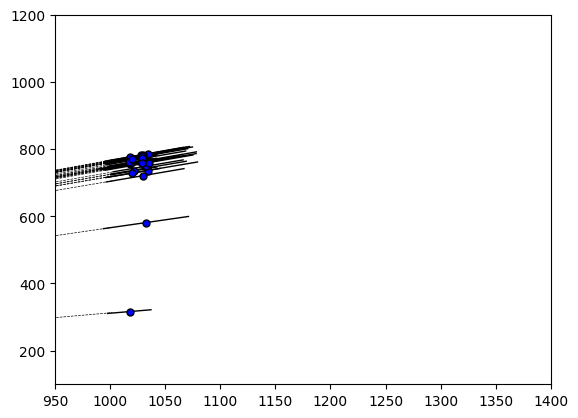

In [45]:
plt.figure()
for r in range(len(FI_final_04b['T_plag_low'])):
    plt.plot([FI_final_04b.loc[r, 'T_plag_low'],FI_final_04b.loc[r, 'T_plag_high']],
                 [FI_final_04b.loc[r, 'P_plag_low'],FI_final_04b.loc[r, 'P_plag_high']], '--k', lw = 0.5)
plt.plot(np.array([FI_final_04b['T_C_mean'].values - 2*FI_final_04b['T_C_std'].values,FI_final_04b['T_C_mean'].values + 2*FI_final_04b['T_C_std'].values]),
       np.array([FI_final_04b['P_MPa_mean'].values - 2*FI_final_04b['P_MPa_std'].values,FI_final_04b['P_MPa_mean'].values + 2*FI_final_04b['P_MPa_std'].values]),
       '-k')
plt.plot(FI_final_04b['T_C_median'][FI_final_04b['Sample'].str.contains('04b')],
       FI_final_04b['P_MPa_median'][FI_final_04b['Sample'].str.contains('04b')],
       'ok', mfc = (0,0,1), ms = 5)

plt.ylim([100,1200])
plt.xlim([950,1400])

plt.savefig('04b.svg', dpi = 600, format = 'svg')

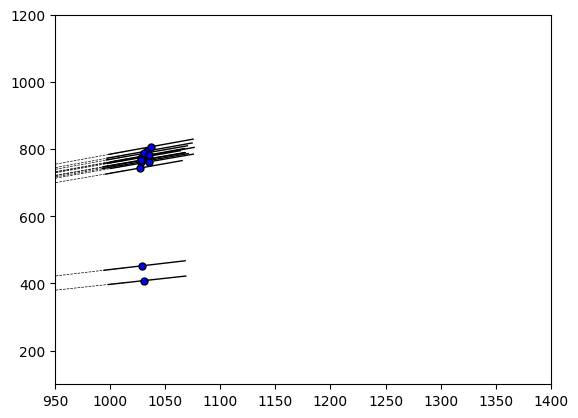

In [46]:
plt.figure()
for r in range(len(FI_final_03b['T_plag_low'])):
    plt.plot([FI_final_03b.loc[r, 'T_plag_low'],FI_final_03b.loc[r, 'T_plag_high']],
                 [FI_final_03b.loc[r, 'P_plag_low'],FI_final_03b.loc[r, 'P_plag_high']], '--k', lw = 0.5)
plt.plot(np.array([FI_final_03b['T_C_mean'].values - 2*FI_final_03b['T_C_std'].values,FI_final_03b['T_C_mean'].values + 2*FI_final_03b['T_C_std'].values]),
       np.array([FI_final_03b['P_MPa_mean'].values - 2*FI_final_03b['P_MPa_std'].values,FI_final_03b['P_MPa_mean'].values + 2*FI_final_03b['P_MPa_std'].values]),
       '-k')
plt.plot(FI_final_03b['T_C_median'][FI_final_03b['Sample'].str.contains('03b')],
       FI_final_03b['P_MPa_median'][FI_final_03b['Sample'].str.contains('03b')],
       'ok', mfc = (0,0,1), ms = 5)

plt.ylim([100,1200])
plt.xlim([950,1400])

plt.savefig('03b.svg', dpi = 600, format = 'svg')